In [1]:
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import json
import import_ipynb
from model import resnet34,resnet50,resnet101

importing Jupyter notebook from model.ipynb


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

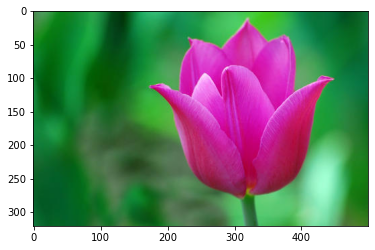

In [4]:
# load image
img = Image.open("../tulip.jpg")
plt.imshow(img)

In [5]:
# [N,C,H,W]
img = data_transform(img)
# expand batch dimension
img = torch.unsqueeze(img,dim=0)

# read class_indict
try:
    json_file = open('./class_indices.json','r')
    class_indict = json.load(json_file)
except Exception as e:
    print(e)

In [6]:
# create model
model = resnet50(num_classes=5)
# load model weights
model_weight_path = 'resNet50.pth'
model.load_state_dict(torch.load(model_weight_path,map_location=device))
model.eval()
with torch.no_grad():
    # predict class
    output = torch.squeeze(model(img))
    predict = torch.softmax(output,dim=0)
    predict_cla = torch.argmax(predict).numpy()
    
print(class_indict[str(predict_cla)], predict[predict_cla].numpy())


tulips 0.99691796
